In [27]:
import torch.nn as nn
import torch
import torch.utils.data as Data
from  sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [28]:
def getdata():
    train_data=load_iris()
    data=train_data['data']
    labels=train_data['target'].reshape(-1,1)
    total_data=np.hstack((data,labels))
    np.random.shuffle(total_data)
    train=total_data[0:120,:-1]
    test=total_data[120:,:-1]
    train_label=total_data[0:120,-1].reshape(-1,1)
    test_label=total_data[120:,-1].reshape(-1,1)
    return data,labels,train,test,train_label,test_label
    


In [29]:
data,labels,train,test,train_label,test_label = getdata()
print(data)
print('*'*90)
print(labels)
print('*'*90)
print(train)
print('*'*90)
print(train_label)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [30]:
# 数据预处理 归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train=scaler.transform(train)
# 4.对测试数据进行归一化处理
test=scaler.transform(test)
print(train)
print('*'*90)
print(test)

[[-1.14213389  0.03780185 -1.26585576 -1.27478726]
 [-1.14213389 -1.54987577 -0.22423731 -0.23591139]
 [ 0.35030967 -0.64263142  0.18083654  0.15366706]
 [-0.27154181 -0.18900924  0.470175    0.41338602]
 [-0.39591211 -1.09625359  0.41230731  0.02380757]
 [-0.27154181 -0.18900924  0.23870423  0.15366706]
 [ 1.09653144  0.03780185  0.58591038  0.41338602]
 [ 1.71838292  1.17185729  1.39605807  1.71198085]
 [-0.02280122 -0.64263142  0.81738115  1.58212137]
 [-0.39591211  0.9450462  -1.38159115 -1.27478726]
 [ 1.22090174 -0.64263142  0.64377807  0.28352654]
 [-1.51524477  0.71823511 -1.32372345 -1.14492778]
 [-1.76398537 -0.18900924 -1.38159115 -1.27478726]
 [ 0.84779085 -0.64263142  0.52804269  0.41338602]
 [ 0.84779085 -0.18900924  1.04885192  0.80296447]
 [-0.39591211  2.53272381 -1.32372345 -1.27478726]
 [ 1.09653144  0.03780185  1.10671961  1.58212137]
 [-1.01776359  0.71823511 -1.20798807 -1.01506829]
 [-0.39591211 -1.54987577  0.00723346 -0.23591139]
 [ 0.35030967 -0.41582033  0.58

In [31]:
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet,self).__init__()
        self.fc = nn.Sequential( #添加神经元以及激活函数
            nn.Linear(4,18),
            nn.ReLU(),
            nn.Linear(18,10),
            nn.ReLU(),
            nn.Linear(10,3),
            nn.Dropout(0.2)
        )
        self.mse=nn.CrossEntropyLoss()
        self.optim=torch.optim.Adam(params=self.parameters(),lr=0.02)
        
    def forward(self,inputs):
        outputs=self.fc(inputs)
        return outputs
    
    def train(self,x,label):
        out=self.forward(x) #正向传播
        loss=self.mse(out,label) #根据正向传播计算损失
        self.optim.zero_grad()#梯度清零
        loss.backward()#计算梯度
        self.optim.step()#应用梯度更新参数
        
    def test(self,test_):
        return self.fc(test_)


In [32]:
data,labels,train,test,train_label,test_label=getdata()
iris_net=IrisNet()
train_dataset = Data.TensorDataset(torch.from_numpy(train).float(),torch.from_numpy(train_label).long())
BATCH_SIZE=5
train_loader = Data.DataLoader(dataset=train_dataset,batch_size=BATCH_SIZE,shuffle=True)
for epoch in range(100):
    for step,(x,y) in enumerate(train_loader):
        y=torch.reshape(y,[BATCH_SIZE])
        iris_net.train(x,y)
        if epoch%10==0:
            print('Epoch: ', epoch, '| Step: ', step, '| batch y: ', y.numpy())



Epoch:  0 | Step:  0 | batch y:  [0 0 2 2 2]
Epoch:  0 | Step:  1 | batch y:  [2 0 0 2 2]
Epoch:  0 | Step:  2 | batch y:  [2 0 0 1 2]
Epoch:  0 | Step:  3 | batch y:  [2 0 2 0 0]
Epoch:  0 | Step:  4 | batch y:  [2 0 1 2 1]
Epoch:  0 | Step:  5 | batch y:  [1 2 2 2 1]
Epoch:  0 | Step:  6 | batch y:  [1 0 1 2 1]
Epoch:  0 | Step:  7 | batch y:  [2 0 0 1 1]
Epoch:  0 | Step:  8 | batch y:  [1 1 0 1 2]
Epoch:  0 | Step:  9 | batch y:  [0 2 2 2 2]
Epoch:  0 | Step:  10 | batch y:  [1 0 0 1 1]
Epoch:  0 | Step:  11 | batch y:  [1 2 1 1 1]
Epoch:  0 | Step:  12 | batch y:  [1 0 2 2 1]
Epoch:  0 | Step:  13 | batch y:  [2 1 2 0 1]
Epoch:  0 | Step:  14 | batch y:  [1 1 1 0 0]
Epoch:  0 | Step:  15 | batch y:  [2 2 2 0 1]
Epoch:  0 | Step:  16 | batch y:  [1 2 2 1 0]
Epoch:  0 | Step:  17 | batch y:  [2 2 1 0 0]
Epoch:  0 | Step:  18 | batch y:  [1 0 1 1 0]
Epoch:  0 | Step:  19 | batch y:  [0 2 2 2 1]
Epoch:  0 | Step:  20 | batch y:  [1 1 1 1 2]
Epoch:  0 | Step:  21 | batch y:  [1 1 0 0 0

Epoch:  80 | Step:  0 | batch y:  [2 2 1 2 2]
Epoch:  80 | Step:  1 | batch y:  [2 0 1 1 1]
Epoch:  80 | Step:  2 | batch y:  [1 0 2 1 2]
Epoch:  80 | Step:  3 | batch y:  [2 2 0 2 2]
Epoch:  80 | Step:  4 | batch y:  [2 2 1 0 2]
Epoch:  80 | Step:  5 | batch y:  [1 1 0 1 2]
Epoch:  80 | Step:  6 | batch y:  [1 1 0 0 1]
Epoch:  80 | Step:  7 | batch y:  [0 0 2 2 0]
Epoch:  80 | Step:  8 | batch y:  [1 0 1 1 2]
Epoch:  80 | Step:  9 | batch y:  [1 1 2 2 0]
Epoch:  80 | Step:  10 | batch y:  [2 0 2 2 0]
Epoch:  80 | Step:  11 | batch y:  [2 1 1 0 1]
Epoch:  80 | Step:  12 | batch y:  [2 1 0 1 1]
Epoch:  80 | Step:  13 | batch y:  [2 1 0 2 2]
Epoch:  80 | Step:  14 | batch y:  [1 1 2 1 0]
Epoch:  80 | Step:  15 | batch y:  [2 0 1 2 1]
Epoch:  80 | Step:  16 | batch y:  [2 1 0 0 2]
Epoch:  80 | Step:  17 | batch y:  [0 0 0 2 1]
Epoch:  80 | Step:  18 | batch y:  [0 0 1 1 2]
Epoch:  80 | Step:  19 | batch y:  [1 2 2 1 1]
Epoch:  80 | Step:  20 | batch y:  [0 0 0 0 1]
Epoch:  80 | Step:  21 

In [33]:
# 查看训练效果 测试集
out=iris_net.test(torch.from_numpy(test).float())
prediction = torch.max(out, 1)[1]# 1返回index  0返回原值
y_pred = prediction.data.numpy()
y_true=test_label.reshape(1,-1)[0]
accuracy = float((y_pred == y_true).astype(int).sum()) / (len(y_true))
print("莺尾花预测准确率",accuracy)

莺尾花预测准确率 1.0



Bad key savefig.frameon in file /home/sk49/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/sk49/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/sk49/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an update

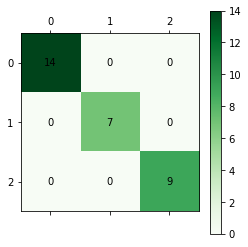

In [34]:
# 衡量模型性能

#true↓ predict→
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_pred, y_true)
#print(cm)
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')

In [35]:
# 分类报告
r = sm.classification_report(y_true, y_pred)
print('分类报告为：', r, sep='\n')

分类报告为：
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00         7
         2.0       1.00      1.00      1.00         9

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

